# Apply KNN technics on Donors Choose data set  

## Author : Zoumana KEITA    

In this notebook, you will understand more advanced technics about:  

- Feature vectorization   
- KNN algorithms using multiple technics: brute KNN, Gridsearch
- Plot and read Area Under the Curve plots.  
- confusion matrices  
- Feature selections  

**Note:** Due to memory problem, I only used 10000 samples. Then By the end of the assignment, I took the best 600 features instead of 2000 initially given, because I always got the value error when I took a value higher than 600. 

# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from scipy.sparse import hstack
#from numpy import hstack

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly ==> plotly module does not work while trying to import.
from chart_studio import plotly # Solution to the previous problem.
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [114]:
project_data = pd.read_csv('train_data.csv', nrows=10000) # Take few dataset due to training time
resource_data = pd.read_csv('resources.csv')

In [115]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [116]:
print(project_data.project_submitted_datetime[0:2])

0    2016-12-05 13:43:57
1    2016-10-25 09:22:10
Name: project_submitted_datetime, dtype: object


In [117]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
7176       79341  p091436  bb2599c4a114d211b3381abe9f899bf8           Mrs.   

     school_state                Date project_grade_category  \
473            GA 2016-04-27 00:53:00          Grades PreK-2   
7176           OH 2016-04-27 07:24:47          Grades PreK-2   

            project_subject_categories        project_subject_subcategories  \
473                   Applied Learning                    Early Development   
7176  Math & Science, Applied Learning  Applied Sciences, Early Development   

                               project_title  \
473   Flexible Seating for Flexible Learning   
7176        Robots are Taking over 2nd Grade   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
7176  Computer coding and robotics, my second grader...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
7176  We are a small, rural school in Northwest Ohio...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
7176  We have a new technology teacher to our distri...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
7176  You can help this dream of ours become a reali...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
7176  My students need a robot mouse STEM activity s...   

      teacher_number_of_previously_posted_projects  project_is_approved  
473                                              2                    1  
7176                                            72                    1

In [118]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [119]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [120]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of `school_state`

In [121]:
# I am going to put all the values into lowercase.
school_state = list(project_data['school_state'].values)

school_state_list = []

for state in school_state:
    school_state_list.append(state.lower())

# Now replace the "school_state" column by the cleaned one.
project_data['clean_school_state'] = school_state_list
project_data.drop(['school_state'], axis=1, inplace=True)

In [122]:
# Check the final result
clean_school_state = list(project_data['clean_school_state'].values)
print(list(set(clean_school_state)))

['in', 'dc', 'ga', 'co', 'mi', 'il', 'mo', 'me', 'hi', 'or', 'ia', 'id', 'nm', 'ny', 'mt', 'tn', 'al', 'ms', 'vt', 'de', 'ma', 'wa', 'sd', 'fl', 'ri', 'nh', 'pa', 'va', 'ks', 'nj', 'ok', 'wv', 'ak', 'oh', 'ky', 'la', 'wi', 'az', 'wy', 'mn', 'nd', 'nc', 'nv', 'ar', 'md', 'ct', 'ut', 'ca', 'ne', 'sc', 'tx']


## 1.5 preprocessing of `teacher_prefix`

In [123]:
# teacher_prefix
'''
After getting the following Error: np.nan is an invalid document, expected byte or unicode string.
I used the strategy below in order to transform all the categories into string. sot that I can perform
the one_hot encoding operation.

https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
'''
project_data['teacher_prefix'] = project_data['teacher_prefix'].apply(lambda x: np.str_(x))

In [124]:
teacher_prefix = list(project_data['teacher_prefix'].values)

teacher_prefix_list = []

for prefix in teacher_prefix:
    prefix = prefix.replace('.','')
    teacher_prefix_list.append(prefix.lower())

# Now replace the "teacher_prefix" column by the cleaned one.
project_data['clean_teacher_prefix'] = teacher_prefix_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

In [125]:
# Check the final result
clean_teacher_prefix = list(project_data['clean_teacher_prefix'].values)
print(list(set(clean_teacher_prefix)))

['ms', 'nan', 'mrs', 'mr', 'teacher']


## 1.6 preprocessing of `project_grade_category`

In [126]:
# I am going to put all the values into lowercase.
project_grade_category = list(project_data['project_grade_category'].values)

project_grade_category_list = []

for pgc in project_grade_category:
    pgc = pgc.lower()
    pgc_replace = pgc.replace(' ', '_')
    pgc_final_replace = pgc_replace.replace('-', '_')
    
    project_grade_category_list.append(pgc_final_replace)
    
# Now replace the "school_state" column by the cleaned one.
project_data['clean_project_grade_category'] = project_grade_category_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [127]:
# Check the final result
clean_project_grade_category = list(project_data['clean_project_grade_category'].values)
print(list(set(clean_project_grade_category)))

['grades_9_12', 'grades_6_8', 'grades_3_5', 'grades_prek_2']


## 1.3 Text preprocessing

In [128]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [129]:
project_data.head(2)

Unnamed: 0       id                        teacher_id  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3   
7176       79341  p091436  bb2599c4a114d211b3381abe9f899bf8   

                    Date                           project_title  \
473  2016-04-27 00:53:00  Flexible Seating for Flexible Learning   
7176 2016-04-27 07:24:47        Robots are Taking over 2nd Grade   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
7176  Computer coding and robotics, my second grader...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
7176  We are a small, rural school in Northwest Ohio...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
7176  We have a new technology teacher to our distri...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
7176  You can help this dream of ours become a reali...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
7176  My students need a robot mouse STEM activity s...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
473                                              2                    1   
7176                                            72                    1   

                  clean_categories               clean_subcategories  \
473                AppliedLearning                  EarlyDevelopment   
7176  Math_Science AppliedLearning  AppliedSciences EarlyDevelopment   

     clean_school_state clean_teacher_prefix clean_project_grade_category  \
473                  ga                  mrs                grades_prek_2   
7176                 oh                  mrs                grades_prek_2   

                                                  essay  
473   I recently read an article about giving studen...  
7176  Computer coding and robotics, my second grader...

In [130]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [131]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)


I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [132]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [133]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

My main goal is to provide a safe and nurturing place where we all take risks. Our classroom is in a rural community in southern Maine. Many of our students come from low to middle-income families. We are a title 1 school. I am hoping to reach the needs of all of my learners.\r\n\r\nWe are a family! We laugh, we learn, we make mistakes, we try again. We have fun! \r\n\r\nMy students are incredibly special because they are a part of me.When you go to Starbucks, do you prefer to sit at the high-top table or do you prefer the soft squishy arm chair? Would you rather sit at a table with a chair near the fireplace or overlooking the street?  I am looking to upgrade my classroom is seating to allow my students that voice and choice in where they will learn best. We are definitely not a one-size-fits-all classroom so how powerful will it be to allow the children the choice to learn where they will do their very best.  \r\n\r\nI believe that with more responsibility will come more motivated an

In [134]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My main goal is to provide a safe and nurturing place where we all take risks. Our classroom is in a rural community in southern Maine. Many of our students come from low to middle-income families. We are a title 1 school. I am hoping to reach the needs of all of my learners.    We are a family! We laugh, we learn, we make mistakes, we try again. We have fun!     My students are incredibly special because they are a part of me.When you go to Starbucks, do you prefer to sit at the high-top table or do you prefer the soft squishy arm chair? Would you rather sit at a table with a chair near the fireplace or overlooking the street?  I am looking to upgrade my classroom is seating to allow my students that voice and choice in where they will learn best. We are definitely not a one-size-fits-all classroom so how powerful will it be to allow the children the choice to learn where they will do their very best.      I believe that with more responsibility will come more motivated and engaged le

In [135]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My main goal is to provide a safe and nurturing place where we all take risks Our classroom is in a rural community in southern Maine Many of our students come from low to middle income families We are a title 1 school I am hoping to reach the needs of all of my learners We are a family We laugh we learn we make mistakes we try again We have fun My students are incredibly special because they are a part of me When you go to Starbucks do you prefer to sit at the high top table or do you prefer the soft squishy arm chair Would you rather sit at a table with a chair near the fireplace or overlooking the street I am looking to upgrade my classroom is seating to allow my students that voice and choice in where they will learn best We are definitely not a one size fits all classroom so how powerful will it be to allow the children the choice to learn where they will do their very best I believe that with more responsibility will come more motivated and engaged learners Your donation will hel

In [136]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [137]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 971.56it/s]


In [138]:
# after preprocesing
preprocessed_essays[5000]

'call classroom robot studio students emerging bilinguals insatiable appetite learning creative projects engineers mathematicians researchers readers writers creative artists love hands learning snuggling good book twenty six twenty eight students two years grade level reading goal 2016 2017 school year engage intensive reading instruction across curriculum ensure students leave third grade empowered drive learning twenty six twenty eight students arrived third grade classroom reading two years grade level standards classroom library currently not contain sufficient amount leveled books appropriate students reading first grade level need build library include leveled books independent reading students build fluency school home voraciously reading right books collection high interest texts first second grade reading levels provide students resources need build reading skills quickly approach ultimately achieve grade level standards nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [139]:
#https://stackoverflow.com/questions/47015139/ordinal-number-to-words-in-python/47015248
from num2words import num2words   # Run pip install num2words if "No module named 'num2words'"

In [140]:
# similarly you can preprocess the titles also
# Replace all the ordinal digit values by their corresponding string values
# https://stackoverflow.com/questions/47015139/ordinal-number-to-words-in-python
def replace_ordinal_numbers(text):
    re_results = re.findall('(\d+(st|nd|rd|th))', text)
    for enitre_result, suffix in re_results:
        num = int(enitre_result[:-2])
        text = text.replace(enitre_result, num2words(num, ordinal=True))
    return text

In [141]:
indexes = [0, 10, 30, 50, 60, 150,1000,2000,3000]
for i in indexes:
    print(replace_ordinal_numbers(project_data['project_title'].values[i]))
    print("="*50)

Flexible Seating for Flexible Learning
Keeping Newark Fit
Items Needed to Make Indistructable Books
Alternative Seating for Kindergarten Creative Thinking
Let's learn full STEAM ahead!
B.E.A.R: Be Excited About Reading
Wiggly Kids = Alternative Seating
Flexible Seating for Engaged Learners!
Creating a Comfortable Learning Environment


In [142]:
# Clean all the project title information 
preprocessed_project_title = []
# tqdm is for printing the status bar
for title in tqdm(project_data['project_title'].values):
    # Apply the ordinal function 
    sent = replace_ordinal_numbers(decontracted(title))
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 18474.37it/s]


In [143]:
preprocessed_project_title[12]

'students focus'

## 1.5 Preparing data for models

In [144]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'Date', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_school_state',
       'clean_teacher_prefix', 'clean_project_grade_category', 'essay'],
      dtype='object')

we are going to consider

       - clean_school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - clean_project_grade_category : categorical data
       - clean_teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [145]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### 1.5.3 Vectorizing Numerical features

In [146]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [147]:
#price_standardized

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [148]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label  

y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)

In [149]:
# ============================== loading libraries ===========================================

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

# Libraries for ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [150]:
'''
There are two columns we must preprocess before operating vectorization. 
So we are going to perform those operations here on the project_data before 
going ahead. 
'''
project_data['project_title'] = preprocessed_project_title
project_data['essay'] = preprocessed_essays



# Create the predictors
X = project_data

# Creating Train - Cross validation - Test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>  

The numerical features below, we are going to perform the **Normalization** operation :    
- teacher_number_of_previously_posted_projects : numerical
- price : numerical

The categorical features, we are going to perform the **One hot encoding** operation :  
- clean_school_state : categorical data  
- clean_categories : categorical data  
- clean_subcategories : categorical data  
- clean_project_grade_category : categorical data  
- clean_teacher_prefix : categorical data   

So we are going to create for each data family (Train - Test - Cross validation) the 
corresponding sparse matrix  

In [151]:
from sklearn.preprocessing import Normalizer

In [152]:

# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label



########################################## Numerical features: Normalization #############################
normalizer = Normalizer()

# Here I did the modification according to the suggestions for the last submission.
# Normalization between (1,-1) instead of (-1,1)
# For Price feature
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_train_price_norm = X_train_price_norm.reshape(-1,1)

X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_test_price_norm = X_test_price_norm.reshape(-1,1)


# For teacher_number_of_previously_posted_projects feature
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_tnppprojects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_tnppprojects_norm = X_train_tnppprojects_norm.reshape(-1,1)

X_cv_tnppprojects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_tnppprojects_norm = X_cv_tnppprojects_norm.reshape(-1,1)

X_test_tnppprojects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_tnppprojects_norm = X_test_tnppprojects_norm.reshape(-1,1)

In [153]:

########################################## Categorical features: One Hot Encoding ###########################
vectorizer = CountVectorizer()

# For school_state feature 
vectorizer.fit(X_train['clean_school_state'].values)
X_train_state_ohe = vectorizer.transform(X_train['clean_school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['clean_school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['clean_school_state'].values)

# For clean_categories feature 
vectorizer.fit(X_train['clean_categories'].values)
X_train_c_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_c_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_c_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

# For project_grade_category feature 
vectorizer.fit(X_train['clean_project_grade_category'].values)
X_train_pg_category_ohe = vectorizer.transform(X_train['clean_project_grade_category'].values)
X_cv_pg_category_ohe = vectorizer.transform(X_cv['clean_project_grade_category'].values)
X_test_pg_category_ohe = vectorizer.transform(X_test['clean_project_grade_category'].values)

vectorizer.fit(X_train['clean_teacher_prefix'].values)
X_train_teacher_pref_ohe = vectorizer.transform(X_train['clean_teacher_prefix'].values)
X_cv_teacher_pref_ohe = vectorizer.transform(X_cv['clean_teacher_prefix'].values)
X_test_teacher_pref_ohe = vectorizer.transform(X_test['clean_teacher_prefix'].values)

In [154]:
print("After vectorizations: ")

print("NORMALIZATION")
print('1- price feature: ')
print('Train  : ', X_train_price_norm.shape, y_train.shape)
print('Cross.V: ', X_cv_price_norm.shape, y_cv.shape)
print('Test   : ', X_test_price_norm.shape, y_test.shape)

print('\n2- Teacher number of previously posted projects feature: ')
print('Train  : ', X_train_tnppprojects_norm.shape, y_train.shape)
print('Cross.V: ', X_cv_tnppprojects_norm.shape, y_cv.shape)
print('Test   : ', X_test_tnppprojects_norm.shape, y_test.shape)

print("\nONE HOT ENCODING")
print('1- School state feature: ')
print('Train: ', X_train_state_ohe.shape, y_train.shape)
print('Cross.V: ', X_cv_state_ohe.shape, y_cv.shape)
print('Test   : ', X_test_state_ohe.shape, y_test.shape)

print('\n2- Clean categories feature: ')
print('Train: ', X_train_c_categories_ohe.shape, y_train.shape)
print('Cross.V: ', X_cv_c_categories_ohe.shape, y_cv.shape)
print('Test   : ', X_test_c_categories_ohe.shape, y_test.shape)

print('\n3- Project grade category feature: ')
print('Train: ', X_train_pg_category_ohe.shape, y_train.shape)
print('Cross.V: ', X_cv_pg_category_ohe.shape, y_cv.shape)
print('Test   : ', X_test_pg_category_ohe.shape, y_test.shape)  

print('\n4- Teacher prefix feature: ')
print('Train: ', X_train_teacher_pref_ohe.shape, y_train.shape)
print('Cross.V: ', X_cv_teacher_pref_ohe.shape, y_cv.shape)
print('Test   : ', X_test_teacher_pref_ohe.shape, y_test.shape) 

After vectorizations: 
NORMALIZATION
1- price feature: 
Train  :  (4489, 1) (4489,)
Cross.V:  (2211, 1) (2211,)
Test   :  (3300, 1) (3300,)

2- Teacher number of previously posted projects feature: 
Train  :  (4489, 1) (4489,)
Cross.V:  (2211, 1) (2211,)
Test   :  (3300, 1) (3300,)

ONE HOT ENCODING
1- School state feature: 
Train:  (4489, 51) (4489,)
Cross.V:  (2211, 51) (2211,)
Test   :  (3300, 51) (3300,)

2- Clean categories feature: 
Train:  (4489, 9) (4489,)
Cross.V:  (2211, 9) (2211,)
Test   :  (3300, 9) (3300,)

3- Project grade category feature: 
Train:  (4489, 4) (4489,)
Cross.V:  (2211, 4) (2211,)
Test   :  (3300, 4) (3300,)

4- Teacher prefix feature: 
Train:  (4489, 4) (4489,)
Cross.V:  (2211, 4) (2211,)
Test   :  (3300, 4) (3300,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>   

For further questions, we are going to perform the following vectorizations:  
- Bag of words  
- Term frequency inverse document frequency (tfidf)  
- Average word to vect (AVG W2V)  
- tfidf W2V  
So it could be a good idea to perform those vectorizations before going ahead.  

In [155]:
########################################## For Bag of words   ###########################
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# 1- ESSAY FEATURE
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)  


# 2- PROJECT TITLE FEATURE
# we use the fitted CountVectorizer to convert the text to vector
X_train_project_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_project_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_bow = vectorizer.transform(X_test['project_title'].values)  

########################################## For tfidf  ###################################
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train dat

# 1- ESSAY FEATURE
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)  

# 2- PROJECT TITLE FEATURE
X_train_project_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_cv_project_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['project_title'].values)  

########################################## For AVG W2V  ###################################
'''
for this part, I will create a function (below) that take in parameter the name of the 
dataset, and create the related AVG W2V.
'''

'\nfor this part, I will create a function (below) that take in parameter the name of the \ndataset, and create the related AVG W2V.\n'

In [156]:
print("After vectorizations")

print("BAG OF WORDS")
print('1- essay feature: ')
print('Train: ', X_train_essay_bow.shape, y_train.shape)
print('Cross.V: ', X_cv_essay_bow.shape, y_cv.shape)
print('Test   : ', X_test_essay_bow.shape, y_test.shape)

print('\n2- project title feature: ')
print('Train: ', X_train_project_title_bow.shape, y_train.shape)
print('Cross.V: ', X_cv_project_title_bow.shape, y_cv.shape)
print('Test   : ', X_test_project_title_bow.shape, y_test.shape)

print("\nTFIDF")
print('1- Essay feature: ')
print('Train: ', X_train_essay_tfidf.shape, y_train.shape)
print('Cross.V: ', X_cv_essay_tfidf.shape, y_cv.shape)
print('Test   : ', X_test_essay_tfidf.shape, y_test.shape)

print('\n2- Project title feature: ')
print('Train: ', X_train_project_title_tfidf.shape, y_train.shape)
print('Cross.V: ', X_cv_project_title_tfidf.shape, y_cv.shape)
print('Test   : ', X_test_project_title_tfidf.shape, y_test.shape)


After vectorizations
BAG OF WORDS
1- essay feature: 
Train:  (4489, 427) (4489,)
Cross.V:  (2211, 427) (2211,)
Test   :  (3300, 427) (3300,)

2- project title feature: 
Train:  (4489, 427) (4489,)
Cross.V:  (2211, 427) (2211,)
Test   :  (3300, 427) (3300,)

TFIDF
1- Essay feature: 
Train:  (4489, 427) (4489,)
Cross.V:  (2211, 427) (2211,)
Test   :  (3300, 427) (3300,)

2- Project title feature: 
Train:  (4489, 427) (4489,)
Cross.V:  (2211, 427) (2211,)
Test   :  (3300, 427) (3300,)


In [157]:
def create_avg_w2v_vectors_from_column(data, column_name):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    
    # For essay column: when we want to operate on that column
    if(column_name == 'essay'):
        data = data['essay']
        
    # For project_title column: when we want to operate on that column
    if(column_name == 'project_title'):
        data = data['project_title']
        
    for sentence in tqdm(data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

In [158]:
# 1- ESSAY FEATURE
X_train_essay_avg_w2v = create_avg_w2v_vectors_from_column(X_train, 'essay')
X_cv_essay_avg_w2v = create_avg_w2v_vectors_from_column(X_cv, 'essay')
X_test_essay_avg_w2v = create_avg_w2v_vectors_from_column(X_test, 'essay')

# 2- PROJECT TITLE FEATURE
X_train_project_title_avg_w2v = create_avg_w2v_vectors_from_column(X_train, 'project_title')
X_cv_project_title_avg_w2v = create_avg_w2v_vectors_from_column(X_cv, 'project_title')
X_test_project_title_avg_w2v = create_avg_w2v_vectors_from_column(X_test, 'project_title') 

100%|███████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 35579.12it/s]


In [159]:
########################################## For TFIDF W2V  ###################################
'''
Here I am going to create a function as previously. The function will take in parameter 
the name of the data, the column and a variable specifying :
    if data = train ==> perform the fit operation
    else ==> do not perform the fit operation. 
'''

# Create global variables to fit only on training data for the two columns
global tfidf_model_essay_column 
tfidf_model_essay_column= TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model_essay_column.fit(X_train['essay'])

global tfidf_model_pro_title_column 
tfidf_model_pro_title_column= TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model_pro_title_column.fit(X_train['project_title'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=10, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [160]:
def create_tf_idf_w2v_from_column(data, column_name):
    
    # For essay column: when we want to operate on that column
    if(column_name=='essay'):
        data_column_value = data['essay']
        tfidf_model_essay_column.fit(data_column_value)
        tfidf_model = tfidf_model_essay_column
        
    # For project_title column: when we want to operate on that column
    if(column_name == 'project_title'):
        data_column_value = data['project_title']
        tfidf_model_pro_title_column.fit(data_column_value)
        tfidf_model = tfidf_model_pro_title_column
        
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    # Similarly you can vectorize for title also  
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data_column_value): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
        
    return tfidf_w2v_vectors

In [161]:
# 1- ESSAY FEATURE
X_train_essay_tfidf_w2v = create_tf_idf_w2v_from_column(X_train, 'essay')
X_cv_essay_tfidf_w2v = create_tf_idf_w2v_from_column(X_cv, 'essay')
X_test_essay_tfidf_w2v = create_tf_idf_w2v_from_column(X_test, 'essay')

# 2- PROJECT TITLE FEATURE
X_train_project_title_tfidf_w2v = create_tf_idf_w2v_from_column(X_train, 'project_title')
X_cv_project_title_tfidf_w2v = create_tf_idf_w2v_from_column(X_cv, 'project_title')
X_test_project_title_tfidf_w2v = create_tf_idf_w2v_from_column(X_test, 'project_title') 

100%|███████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 33422.77it/s]


In [162]:
print('After vectorizations: ')
print('TFIDF W2V')
print('1- Essay feature')
print('Train     :', len(X_train_essay_tfidf_w2v))
print('Cross val :', len(X_cv_essay_tfidf_w2v))
print('Test      :', len(X_test_essay_tfidf_w2v))

print('\n2- Project title feature')
print('Train     :', len(X_train_project_title_tfidf_w2v))
print('Cross val :', len(X_cv_project_title_tfidf_w2v))
print('Test      :', len(X_test_project_title_tfidf_w2v))

After vectorizations: 
TFIDF W2V
1- Essay feature
Train     : 4489
Cross val : 2211
Test      : 3300

2- Project title feature
Train     : 4489
Cross val : 2211
Test      : 3300


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### Useful functions:  
After I noticed that most of the operations to perform are similar, I decided to create  
multiple functions (below) to avoid duplicating codes.  

In [163]:
# Batch prediction function used to avoid "Memory limitations"
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [164]:
# TRAIN & CV AUC
def plot_train_CV_AUC(X_tr, y_tr, X_val, y_val, title):
    
    myList = list(range(0,30))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))  
    train_auc = []
    cv_auc = []

    for n in tqdm(neighbors):
        
        # Instanciate learning model k = n
        knn = KNeighborsClassifier(n_neighbors=n)
        
        # Fitting the model on on the train set.
        knn.fit(X_tr, y_tr)

        y_train_pred = batch_predict(knn, X_tr)    
        y_cv_pred = batch_predict(knn, X_val)

        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_val, y_cv_pred))

    plt.plot(neighbors, train_auc, label='Train AUC')
    plt.plot(neighbors, cv_auc, label='CV AUC')

    plt.scatter(neighbors, train_auc, label='Train AUC points')
    plt.scatter(neighbors, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title(title)
    plt.grid()
    plt.show()

In [165]:
def perform_grid_search(X_tr, y_tr, cv_value, title):
    # Our knn model
    knn = KNeighborsClassifier()
    
    myList = list(range(0,30))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))  

    parameters = {'n_neighbors':neighbors}

    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    # Set n_jobs = -1 to use all the processors.

    # Increasing the value of cv parameter results in getting more robust value.
    clf = GridSearchCV(knn, parameters, cv=cv_value, scoring='roc_auc', return_train_score=True, n_jobs=-1)
    clf.fit(X_tr, y_tr)  

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']  

    plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')

    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['n_neighbors'], 
                           train_auc - train_auc_std,train_auc + train_auc_std, 
                           alpha=0.2,color='darkblue')  

    plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['n_neighbors'],  
                           cv_auc - cv_auc_std,cv_auc + cv_auc_std,  
                           alpha=0.2,color='darkorange')

    plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
    plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title(title)
    plt.grid()
    plt.show()
    

    # I return clf in order to get the different values like:
    # - best_score_ 
    # - best_params_
    # - best_estimator_
    return clf
    

In [166]:
def plot_AUC_and_give_parameters(X_tr, y_tr, X_test, y_test, best_k):
    
    myList = list(range(0,30))
    #neighbors = list(filter(lambda x: x % 2 != 0, myList))  
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_tr, y_tr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    # set1_train_bow, y_train
    y_train_pred = batch_predict(knn, X_tr)    
    y_test_pred = batch_predict(knn, X_test)

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate (FP Rate)")
    plt.ylabel("True Positive Rate (TP Rate)")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()
    
    # Return the values needed for confusion matrix
    return y_train_pred, y_test_pred, train_fpr, train_tpr, tr_thresholds, test_fpr, test_tpr, te_thresholds


In [167]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr (False Positive Rate)
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [168]:
def plot_confusion_matrix(y_target, y_target_pred, tr_thresholds, target_fpr1, target_fpr2, title):
    
    cf_matrix_train = confusion_matrix(y_target, predict(y_target_pred, tr_thresholds, target_fpr1, target_fpr2))
    # Code from: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    #plt.figure(figsize=(5,5))
    df_cm = pd.DataFrame(cf_matrix_train, range(2), range(2))
    sns.set(font_scale=1.5) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}) # font size
    plt.xlabel('Target classes')
    plt.ylabel('Output classes')
    plt.title(title)
    plt.grid()
    plt.show()

<h4>Parameters information</h4>  

Note: We are going to use the **Simple cross validation** for the KNN classifier.  
For the KNN classifier, it is important to highlight those information: 
<ul>Choice of "K" values
    <li>Even numbers: taking even number for "K" value is not recommended, because the classifier will 
    not be able to make a choice. Let our query point "Yq" to be classified.  
    If the nearest neighbors are : two positive points and two negative points, the model will be "confused"  
    and will not be able to say if the query point is positive or negative</li>
    <li>Odd numbers: those numbers are the used to fix the previous problem. To do so, we are going 
    to use odd numbers for our "K" values instead.</li>
</ul>


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>  
Before applying any algorithme, I need to create the corresponding matrixes for each case (From Set1 to Set4)

In [169]:
# Creating the corresponding matrixes  
set1_train_bow = hstack((X_train_price_norm, X_train_tnppprojects_norm, 
                         X_train_state_ohe, X_train_c_categories_ohe, 
                         X_train_pg_category_ohe, X_train_teacher_pref_ohe, 
                         X_train_project_title_bow, X_train_essay_bow)).tocsr()

set1_val_bow = hstack((X_cv_price_norm, X_cv_tnppprojects_norm, 
                         X_cv_state_ohe, X_cv_c_categories_ohe, 
                         X_cv_pg_category_ohe, X_cv_teacher_pref_ohe, 
                         X_cv_project_title_bow, X_cv_essay_bow)).tocsr()

set1_test_bow = hstack((X_test_price_norm, X_test_tnppprojects_norm, 
                         X_test_state_ohe, X_test_c_categories_ohe, 
                         X_test_pg_category_ohe, X_test_teacher_pref_ohe, 
                         X_test_project_title_bow, X_test_essay_bow)).tocsr()

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:33<00:00,  2.27s/it]


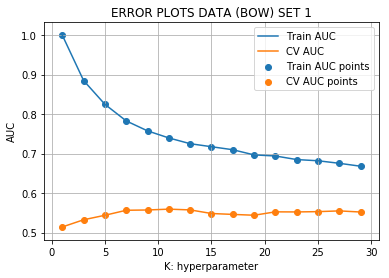

In [170]:
# TRAIN & CV AUC  
plot_train_CV_AUC(set1_train_bow, y_train, 
                    set1_val_bow, y_cv, 
                    "ERROR PLOTS DATA (BOW) SET 1")

#### 2.4.1.1 Applying GridSearch method on BOW,<font color='red'> SET 1</font>  


In [171]:
# Apply gridsearch technic from :
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

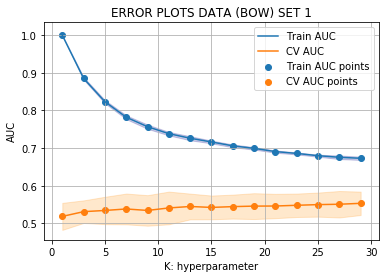

In [172]:
# GRID SEARCH
plot_and_clf = perform_grid_search(set1_train_bow, y_train, 
                                   10, "ERROR PLOTS DATA (BOW) SET 1")

In [173]:
print(plot_and_clf.best_score_)
print(plot_and_clf.best_estimator_)
print(plot_and_clf.best_params_)

0.5532454536708876
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')
{'n_neighbors': 29}


#### 2.4.1.2 Plot the AUC representation on BOW,<font color='red'> SET 1</font>  

Below we are going to plot the AUC curve using our **besk K** value found with the gridsearch  
method. The **best K** value is given by the **{'n_neighbors': best_k_value}**, so **best K = plot_and_clf.best_params_['n_neighbors']** 

In [174]:
best_k = plot_and_clf.best_params_['n_neighbors']
print(best_k)

29


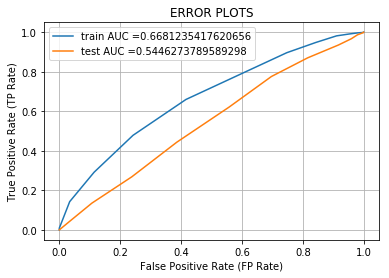

In [175]:
# PLOT AUC FOR SET 1
y_train_pred, y_test_pred, train_fpr, train_tpr, tr_thresholds, test_fpr, test_tpr, te_thresholds = plot_AUC_and_give_parameters(set1_train_bow, y_train, 
                                                                                    set1_test_bow, y_test, 
                                                                                    best_k)

#### 2.4.1.3 Plot the confusion matrix representation on the Test dataset BOW,<font color='red'> SET 1</font>    

We are going to print the confusion matrix with predicted and original labels of test data points.   

##### A - Train confusion matrix  

In [176]:
print("Train confusion matrix")
cf_matrix_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(cf_matrix_train)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24295198585208716 for threshold 0.828
[[ 393  280]
 [1298 2518]]


the maximum value of tpr*(1-fpr) 0.24295198585208716 for threshold 0.828


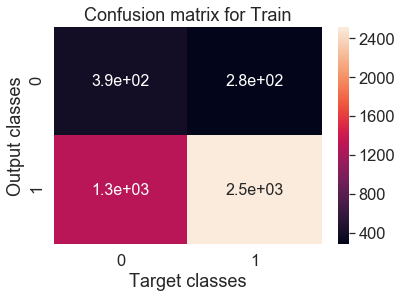

In [177]:
# y_train_pred, tr_thresholds, train_fpr1, train_fpr2
plot_confusion_matrix(y_train, y_train_pred, tr_thresholds, train_fpr, train_fpr, 'Confusion matrix for Train')

##### B- Test confusion matrix  

In [178]:
print("Test confusion matrix")
cf_matrix_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))
print(cf_matrix_test)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2466850321395776 for threshold 0.828
[[ 219  276]
 [1063 1742]]


the maximum value of tpr*(1-fpr) 0.2466850321395776 for threshold 0.828


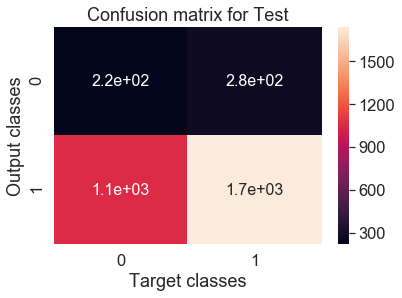

In [179]:
plot_confusion_matrix(y_test, y_test_pred, te_thresholds, test_fpr, test_fpr, 'Confusion matrix for Test')

## Note:  
For the below instructions, we are going to follow the same process as previously. So we already 
did the most difficult part.  

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [180]:
# Creating the corresponding matrixes 
set2_train_tfidf = hstack((X_train_price_norm, X_train_tnppprojects_norm, 
                         X_train_state_ohe, X_train_c_categories_ohe, 
                         X_train_pg_category_ohe, X_train_teacher_pref_ohe, 
                         X_train_project_title_tfidf, X_train_essay_tfidf)).tocsr()

set2_val_tfidf = hstack((X_cv_price_norm, X_cv_tnppprojects_norm, 
                         X_cv_state_ohe, X_cv_c_categories_ohe, 
                         X_cv_pg_category_ohe, X_cv_teacher_pref_ohe, 
                         X_cv_project_title_tfidf, X_cv_essay_tfidf)).tocsr()

set2_test_tfidf = hstack((X_test_price_norm, X_test_tnppprojects_norm, 
                         X_test_state_ohe, X_test_c_categories_ohe, 
                         X_test_pg_category_ohe, X_test_teacher_pref_ohe, 
                         X_test_project_title_tfidf, X_test_essay_tfidf)).tocsr()

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:35<00:00,  2.36s/it]


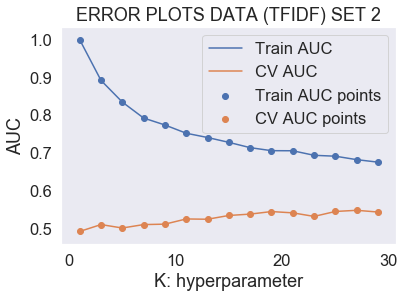

In [181]:
# TRAIN & CV AUC  
plot_train_CV_AUC(set2_train_tfidf , y_train, 
                    set2_val_tfidf, y_cv, 
                    "ERROR PLOTS DATA (TFIDF) SET 2")

#### 2.4.2.1 Applying GridSearch method on TFIDF,<font color='red'> SET 2</font>  

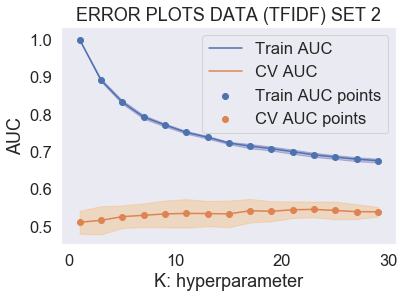

In [182]:
# GRID SEARCH
plot_and_clf = perform_grid_search(set2_train_tfidf, y_train, 
                                   10, "ERROR PLOTS DATA (TFIDF) SET 2")

In [183]:
print(plot_and_clf.best_score_)
print(plot_and_clf.best_estimator_)
print(plot_and_clf.best_params_)

0.5457021964777452
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')
{'n_neighbors': 23}


#### 2.4.2.2 Plot the AUC representation on TFIDF,<font color='red'> SET 2</font>  

Below we are going to plot the AUC curve using our **besk K** value found with the gridsearch  
method. The **best K** value is given by the **{'n_neighbors'}**, so **best K = clf.best_params_['n_neighbors']** 

In [184]:
best_k = plot_and_clf.best_params_['n_neighbors']
print(best_k)

23


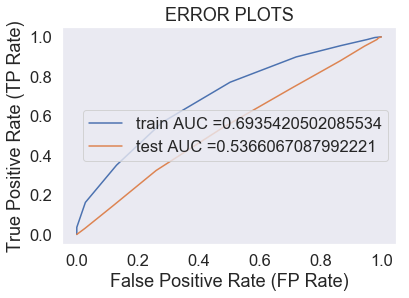

In [185]:
# PLOT AUC FOR SET 2
y_train_pred, y_test_pred, train_fpr, train_tpr, tr_thresholds, test_fpr, test_tpr, te_thresholds = plot_AUC_and_give_parameters(set2_train_tfidf, y_train, 
                                                                                    set2_test_tfidf, y_test, 
                                                                                    best_k)

#### 2.4.2.3 Plot the confusion matrix representation on the Test dataset TFIDF,<font color='red'> SET 2</font>    

##### A - Train confusion matrix  

In [186]:
print("Train confusion matrix")
cf_matrix_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(cf_matrix_train)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998620092773924 for threshold 0.826
[[ 334  339]
 [ 878 2938]]


the maximum value of tpr*(1-fpr) 0.24998620092773924 for threshold 0.826


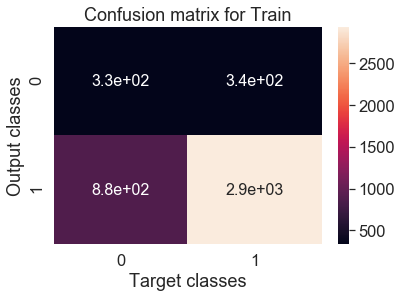

In [187]:
# y_train_pred, tr_thresholds, train_fpr1, train_fpr2
plot_confusion_matrix(y_train, y_train_pred, tr_thresholds, train_fpr, train_fpr, 'Confusion matrix for Train')

##### B - Test confusion matrix  

In [188]:
print("Test confusion matrix")
cf_matrix_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))
print(cf_matrix_test)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24955004591368227 for threshold 0.87
[[ 258  237]
 [1292 1513]]


the maximum value of tpr*(1-fpr) 0.24955004591368227 for threshold 0.87


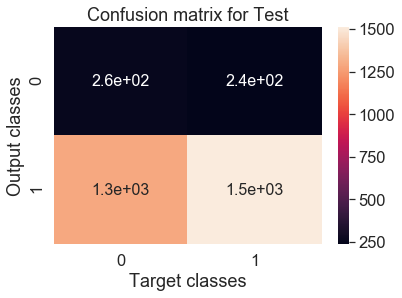

In [189]:
plot_confusion_matrix(y_test, y_test_pred, te_thresholds, test_fpr, test_fpr, 'Confusion matrix for Test')

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [190]:
# Creating the corresponding matrixes 
set3_train_avg_w2v = hstack((X_train_price_norm, X_train_tnppprojects_norm, 
                         X_train_state_ohe, X_train_c_categories_ohe, 
                         X_train_pg_category_ohe, X_train_teacher_pref_ohe, 
                         X_train_project_title_avg_w2v, X_train_essay_avg_w2v)).tocsr()

set3_val_bow_avg_w2v = hstack((X_cv_price_norm, X_cv_tnppprojects_norm, 
                         X_cv_state_ohe, X_cv_c_categories_ohe, 
                         X_cv_pg_category_ohe, X_cv_teacher_pref_ohe, 
                         X_cv_project_title_avg_w2v, X_cv_essay_avg_w2v)).tocsr()

set3_test_bow_avg_w2v = hstack((X_test_price_norm, X_test_tnppprojects_norm, 
                         X_test_state_ohe, X_test_c_categories_ohe, 
                         X_test_pg_category_ohe, X_test_teacher_pref_ohe, 
                         X_test_project_title_avg_w2v, X_test_essay_avg_w2v)).tocsr()

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [12:19<00:00, 49.29s/it]


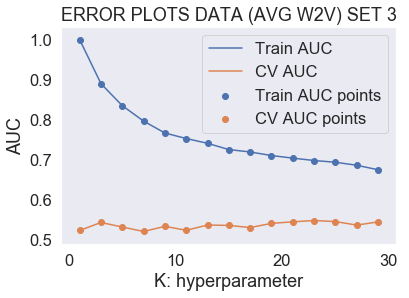

In [191]:
# TRAIN & CV AUC  
plot_train_CV_AUC(set3_train_avg_w2v , y_train, 
                    set3_val_bow_avg_w2v, y_cv, 
                    "ERROR PLOTS DATA (AVG W2V) SET 3")

#### 2.4.3.1 Applying GridSearch method on AVG W2V,<font color='red'> SET 3</font>  

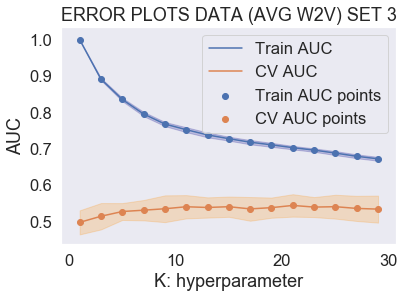

In [192]:
# GRID SEARCH
plot_and_clf = perform_grid_search(set3_train_avg_w2v, y_train, 
                                   10, "ERROR PLOTS DATA (AVG W2V) SET 3")

In [193]:
print(plot_and_clf.best_score_)
print(plot_and_clf.best_estimator_)
print(plot_and_clf.best_params_)

0.544117850523633
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')
{'n_neighbors': 21}


#### 2.4.3.2 Plot the AUC representation on  AVG W2V, <font color='red'> SET 3</font>  

In [194]:
best_k = plot_and_clf.best_params_['n_neighbors']
print(best_k)

21


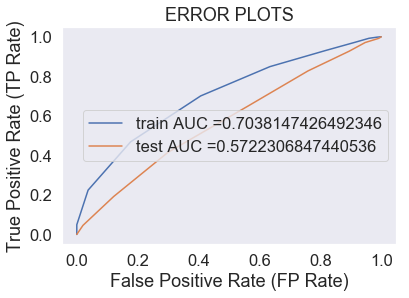

In [195]:
# PLOT AUC FOR SET 3
y_train_pred, y_test_pred, train_fpr, train_tpr, tr_thresholds, test_fpr, test_tpr, te_thresholds = plot_AUC_and_give_parameters(set3_train_avg_w2v, y_train, 
                                                                                    set3_test_bow_avg_w2v, y_test, 
                                                                                    best_k)

#### 2.4.3.3 Plot the confusion matrix representation on the Test dataset AVG W2V,<font color='red'> SET 3</font>    

##### A - Train confusion matrix  

In [196]:
print("Train confusion matrix")
cf_matrix_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(cf_matrix_train)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2413755798370164 for threshold 0.857
[[ 399  274]
 [1142 2674]]


the maximum value of tpr*(1-fpr) 0.2413755798370164 for threshold 0.857


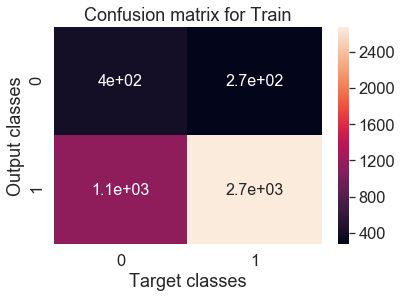

In [197]:
# y_train_pred, tr_thresholds, train_fpr1, train_fpr2
plot_confusion_matrix(y_train, y_train_pred, tr_thresholds, train_fpr, train_fpr, 'Confusion matrix for Train')

##### B - Test confusion matrix  

In [198]:
print("Test confusion matrix")
cf_matrix_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))
print(cf_matrix_test)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24644832159983673 for threshold 0.857
[[ 218  277]
 [ 991 1814]]


the maximum value of tpr*(1-fpr) 0.24644832159983673 for threshold 0.857


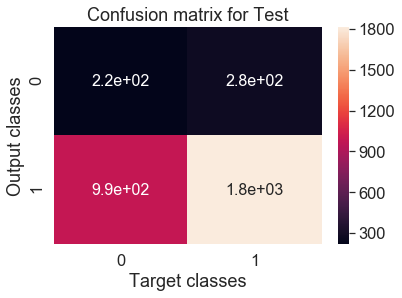

In [199]:
plot_confusion_matrix(y_test, y_test_pred, te_thresholds, test_fpr, test_fpr, 'Confusion matrix for Test')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [200]:
# Creating the corresponding matrixes 
set4_train_tfidf_w2v = hstack((X_train_price_norm, X_train_tnppprojects_norm, 
                         X_train_state_ohe, X_train_c_categories_ohe, 
                         X_train_pg_category_ohe, X_train_teacher_pref_ohe, 
                         X_train_project_title_tfidf_w2v, X_train_essay_tfidf_w2v)).tocsr()

set4_val_tfidf_w2v = hstack((X_cv_price_norm, X_cv_tnppprojects_norm, 
                         X_cv_state_ohe, X_cv_c_categories_ohe, 
                         X_cv_pg_category_ohe, X_cv_teacher_pref_ohe, 
                         X_cv_project_title_tfidf_w2v, X_cv_essay_tfidf_w2v)).tocsr()

set4_test_tfidf_w2v = hstack((X_test_price_norm, X_test_tnppprojects_norm, 
                         X_test_state_ohe, X_test_c_categories_ohe, 
                         X_test_pg_category_ohe, X_test_teacher_pref_ohe, 
                         X_test_project_title_tfidf_w2v, X_test_essay_tfidf_w2v)).tocsr()

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [12:31<00:00, 50.10s/it]


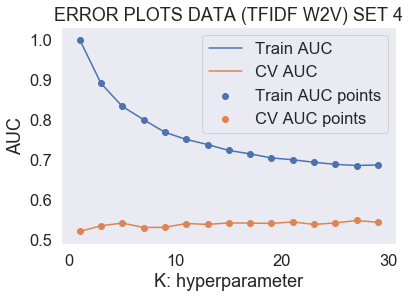

In [201]:
# TRAIN & CV AUC  
plot_train_CV_AUC(set4_train_tfidf_w2v, y_train, 
                    set4_val_tfidf_w2v, y_cv, 
                    "ERROR PLOTS DATA (TFIDF W2V) SET 4")

#### 2.4.4.1 Applying GridSearch method on TFIDF W2V,<font color='red'> SET 4</font>  

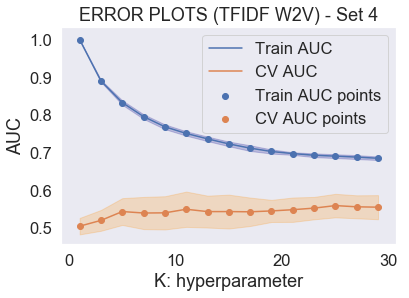

In [202]:
plot_and_clf = perform_grid_search(set4_train_tfidf_w2v, y_train, 
                                   10, "ERROR PLOTS (TFIDF W2V) - Set 4")

In [203]:
print(plot_and_clf.best_score_)
print(plot_and_clf.best_estimator_)
print(plot_and_clf.best_params_)

0.5596880471922628
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')
{'n_neighbors': 25}


In [204]:
best_k = plot_and_clf.best_params_['n_neighbors']

# Check the besk value
print(best_k)

25


#### 2.4.4.2 Plot the AUC representation on  TFIDF W2V, <font color='red'> SET 4</font>  

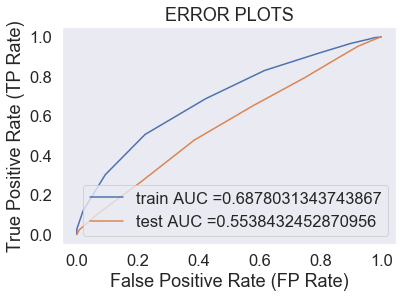

In [205]:
# PLOT AUC FOR SET 4
y_train_pred, y_test_pred, train_fpr, train_tpr, tr_thresholds, test_fpr, test_tpr, te_thresholds = plot_AUC_and_give_parameters(set4_train_tfidf_w2v, y_train, 
                                                                                    set4_test_tfidf_w2v, y_test, 
                                                                                    best_k)

#### 2.4.3.3 Plot the confusion matrix representation on the Test dataset TFIDF W2V,<font color='red'> SET 4</font>    

##### A - Train confusion matrix  

In [206]:
print("Train confusion matrix")
cf_matrix_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(cf_matrix_train)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24414422569541802 for threshold 0.84
[[ 388  285]
 [1196 2620]]


the maximum value of tpr*(1-fpr) 0.24414422569541802 for threshold 0.84


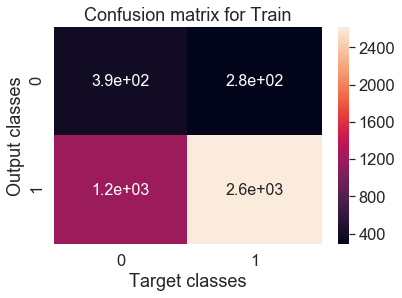

In [207]:
# y_train_pred, tr_thresholds, train_fpr1, train_fpr2
plot_confusion_matrix(y_train, y_train_pred, tr_thresholds, train_fpr, train_fpr, 'Confusion matrix for Train')

##### B - Test confusion matrix  

In [208]:
print("Test confusion matrix")
cf_matrix_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))
print(cf_matrix_test)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24395061728395062 for threshold 0.84
[[ 209  286]
 [ 982 1823]]


the maximum value of tpr*(1-fpr) 0.24395061728395062 for threshold 0.84


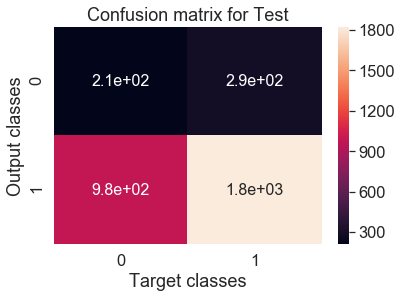

In [209]:
plot_confusion_matrix(y_test, y_test_pred, te_thresholds, test_fpr, test_fpr, 'Confusion matrix for Test')

<h2>2.5 Feature selection with `SelectKBest` </h2>  

As specified in the question N°4, we will be performing the steps, we will select the top 600 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then we will apply KNN on top of these features

In [210]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

#### 2.5.1 Feature selection with `SelectKBest`  

In [216]:
# Get the 600 best features.
selector = SelectKBest(chi2, k = 600)

# Fit the selector on the training dataset
selector.fit(set2_train_tfidf, y_train)

# Selection of the best features for the Train Set2
X_set2_train_best_features = selector.transform(set2_train_tfidf)

# Selection of the best features for the validation Set2
X_set2_val_best_features = selector.transform(set2_val_tfidf)

# Selection of the best features for the test Set2
X_set2_test_best_features = selector.transform(set2_test_tfidf)

In [217]:
print("Before best feature selection: ")
print("Train      : ", set2_train_tfidf.shape)
print("Validation : ", set2_val_tfidf.shape)
print("Test       : ", set2_test_tfidf.shape)  

print("\nAfter best feature selection: ")
print("Train      : ", X_set2_train_best_features.shape)
print("Validation : ", X_set2_val_best_features.shape)
print("Test       : ", X_set2_test_best_features.shape)  

Before best feature selection: 
Train      :  (4489, 924)
Validation :  (2211, 924)
Test       :  (3300, 924)

After best feature selection: 
Train      :  (4489, 600)
Validation :  (2211, 600)
Test       :  (3300, 600)


#### 2.5.2 Application without GridSearch method on TFIDF,<font color='red'> SET 2</font>  

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:42<00:00,  2.82s/it]


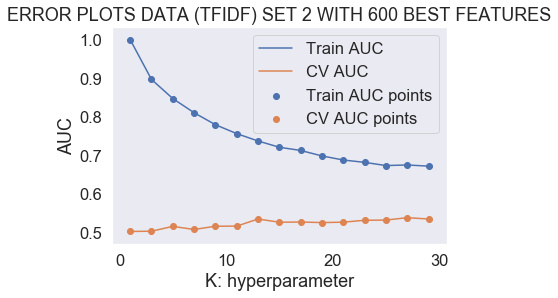

In [218]:
# TRAIN & CV AUC  
plot_train_CV_AUC(X_set2_train_best_features , y_train, 
                    X_set2_val_best_features, y_cv, 
                    "ERROR PLOTS DATA (TFIDF) SET 2 WITH 600 BEST FEATURES")

#### 2.5.3 Applying GridSearch method on TFIDF ,<font color='red'> SET 2</font>  

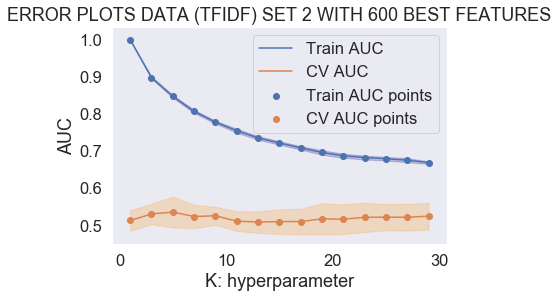

In [219]:
# GRID SEARCH
plot_and_clf = perform_grid_search(X_set2_train_best_features, y_train, 
                                   10, "ERROR PLOTS DATA (TFIDF) SET 2 WITH 600 BEST FEATURES")

In [220]:
print(plot_and_clf.best_score_)
print(plot_and_clf.best_estimator_)
print(plot_and_clf.best_params_)

0.5354399502675625
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
{'n_neighbors': 5}


#### 2.5.3 Plot the AUC representation on TFIDF,<font color='red'> SET 2</font>  

Below we are going to plot the AUC curve using our **besk K** value found with the gridsearch  
method. The **best K** value is given by the **{'n_neighbors'}**, so **best K = clf.best_params_['n_neighbors']** 

In [221]:
best_k = plot_and_clf.best_params_['n_neighbors']
print(best_k)

5


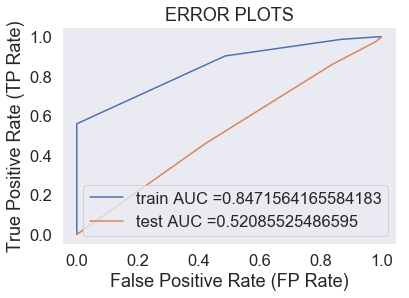

In [222]:
# PLOT AUC FOR SET 2
y_train_pred, y_test_pred, train_fpr, train_tpr, tr_thresholds, test_fpr, test_tpr, te_thresholds = plot_AUC_and_give_parameters(X_set2_train_best_features, y_train, 
                                                                                    X_set2_test_best_features, y_test, 
                                                                                    best_k)

#### 2.5.4 Plot the confusion matrix representation on the Test dataset TFIDF,<font color='red'> SET 2</font>    

##### A - Train confusion matrix  

In [223]:
print("Train confusion matrix")
cf_matrix_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(cf_matrix_train)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24984048272466544 for threshold 0.8
[[ 345  328]
 [ 371 3445]]


the maximum value of tpr*(1-fpr) 0.24984048272466544 for threshold 0.8


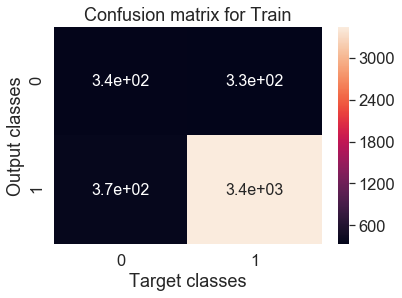

In [224]:
# y_train_pred, tr_thresholds, train_fpr1, train_fpr2
plot_confusion_matrix(y_train, y_train_pred, tr_thresholds, train_fpr, train_fpr, 'Confusion matrix for Train')

##### B - Test confusion matrix  

In [225]:
print("Test confusion matrix")
cf_matrix_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr))
print(cf_matrix_test)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2436322824201612 for threshold 1.0
[[ 287  208]
 [1522 1283]]


the maximum value of tpr*(1-fpr) 0.2436322824201612 for threshold 1.0


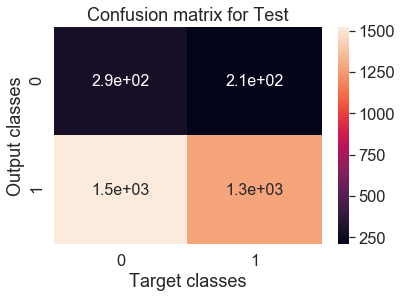

In [226]:
plot_confusion_matrix(y_test, y_test_pred, te_thresholds, test_fpr, test_fpr, 'Confusion matrix for Test')

<h1>3. Conclusions</h1>  
To do an accurate comparison, I will take three digits of precision. Otherwise, I could note make an accurate conclusion. For example, with two digits precision, the following models will be compared as having the same performance:  

- Model using BOW  
- Model using AVG W2V

In [1]:
# Please compare all your models using Prettytable library   
from prettytable import PrettyTable 

# Technic from http://zetcode.com/python/prettytable/
summart_table = PrettyTable() 

# define the variable for the name of the fields
summart_table.field_names = ['Vectorizer', 'Model', 'Hyper parameter', 'AUC']

# Adding the values for each row
summart_table.add_row(['BOW', 'Brute', 29, 0.544])
summart_table.add_row(['TFIDF', 'Brute', 23, 0.536])
summart_table.add_row(['AVG W2V', 'Brute', 21, 0.572])
summart_table.add_row(['TFIDF W2V', 'Brute', 25, 0.553])
summart_table.add_row(['TFIDF', 'Top 600', 5, 0.520])

# Final result
print(summart_table)

+------------+---------+-----------------+-------+
| Vectorizer |  Model  | Hyper parameter |  AUC  |
+------------+---------+-----------------+-------+
|    BOW     |  Brute  |        29       | 0.544 |
|   TFIDF    |  Brute  |        23       | 0.536 |
|  AVG W2V   |  Brute  |        21       | 0.572 |
| TFIDF W2V  |  Brute  |        25       | 0.553 |
|   TFIDF    | Top 600 |        5        |  0.52 |
+------------+---------+-----------------+-------+


**Note**: By looking at the AUC values, we can say that the model using **AVG W2V** vectorizer is the best model, because it has the highest AUC value (0.58).  